In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import gutenberg, stopwords
from collections import Counter
import nltk
import matplotlib

nltk.download('gutenberg')
!python -m spacy download 'en'

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/amyscott/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!



    Linking successful
    /anaconda3/lib/python3.7/site-packages/en_core_web_sm -->
    /anaconda3/lib/python3.7/site-packages/spacy/data/en

    You can now load the model via spacy.load('en')



In [3]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/anaconda3/bin/python
3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)


In [4]:
from nltk.corpus import gutenberg, stopwords
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [5]:
poem = gutenberg.raw('blake-poems.txt')
thursday= gutenberg.raw('chesterton-thursday.txt')

pattern = "[\[].*?[\]]"
poem = re.sub(pattern, "", poem)
thursday = re.sub(pattern, "", thursday)



In [6]:
poem = re.sub(r'Chapter \d+', '', poem)
thursday = re.sub(r'CHAPTER .*', '', thursday)

poem = ' '.join(poem.split())
thursday = ' '.join(thursday.split())


In [7]:
print('Extra whitespace removed:\n', poem[0:100])
print('Extra whitespace removed:\n', thursday[0:100])

Extra whitespace removed:
 SONGS OF INNOCENCE AND OF EXPERIENCE and THE BOOK of THEL SONGS OF INNOCENCE INTRODUCTION Piping dow
Extra whitespace removed:
 To Edmund Clerihew Bentley A cloud was on the mind of men, and wailing went the weather, Yea, a sick


In [8]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
import spacy
nlp = spacy.load('en')
nlp.max_length

poem_doc = nlp(poem)
thursday_doc = nlp(thursday)

In [48]:
def bag_of_words(text):
    
    allwords = [token.lemma_
                for token in text
                if not token.is_punct
                and not token.is_stop]
    
    return [item[0] for item in Counter(allwords).most_common(2000)]
    

def bow_features(sentences, common_words):
    df = pd.DataFrame(columns=common_words)
    df['text_sentence'] = sentences[0]
    df['text_source'] = sentences[1]
    df.loc[:, common_words] = 0

    
    

    

    for i, sentence in enumerate(df['text_sentence']):
        
        words = [token.lemma_
                 for token in sentence
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in common_words
                 )]
        
        for word in words:
            df.loc[i, word] += 1
        
        if i % 50 == 0:
            print("Processing row {}".format(i))
            
    return df


poemwords = bag_of_words(poem_doc)
thursdaywords = bag_of_words(thursday_doc)


common_words = set(poemwords + thursdaywords)

In [10]:
from collections import Counter

def word_frequencies(text, include_stop=True):
    
    words = []
    for token in text:
        if not token.is_punct and (not token.is_stop or include_stop):
            words.append(token.text)
  
    return Counter(words)
    
poem_freq = word_frequencies(poem_doc).most_common(10)
thursday_freq = word_frequencies(thursday_doc).most_common(10)
print('Poem:', poem_freq)
print('Thursday:', thursday_freq)

Poem: [('the', 351), ('And', 176), ('and', 169), ('of', 131), ('I', 130), ('in', 116), ('a', 108), ('to', 92), ('my', 72), ('The', 61)]
Thursday: [('the', 3290), ('a', 1712), ('of', 1710), ('and', 1568), ('to', 1044), ('in', 887), ('I', 880), ('he', 858), ('that', 840), ('his', 765)]


In [11]:
poem_freq = word_frequencies(poem_doc, include_stop=False).most_common(10)
thursday_freq = word_frequencies(thursday_doc, include_stop=False).most_common(10)
print('Poem:', poem_freq)
print('Thursday:', thursday_freq)

Poem: [('And', 176), ('I', 130), ('The', 61), ("'s", 43), ('thee', 42), ('like', 29), ('thy', 28), ('thou', 28), ('THE', 27), ('little', 26)]
Thursday: [('I', 880), ('Syme', 512), ('said', 495), ('The', 325), ('man', 272), ('He', 268), ('like', 260), ("'s", 223), ('But', 161), ('It', 152)]


In [12]:
poem_common = [pair[0] for pair in poem_freq]
thursday_common = [pair[0] for pair in thursday_freq]

print('Unique to Poem:', set(poem_common) - set(thursday_common))
print('Unique to Thursday:', set(thursday_common) - set(poem_common))

Unique to Poem: {'And', 'thee', 'thy', 'thou', 'THE', 'little'}
Unique to Thursday: {'He', 'said', 'Syme', 'It', 'man', 'But'}


In [13]:
def lemma_frequencies(text, include_stop=True):
    
    lemmas = []
    for token in text:
        if not token.is_punct and (not token.is_stop or include_stop):
            lemmas.append(token.lemma_)
            
    return Counter(lemmas)


poem_lemma_freq = lemma_frequencies(poem_doc, include_stop=False).most_common(10)
thursday_lemma_freq = lemma_frequencies(thursday_doc, include_stop=False).most_common(10)
print('Poem:', poem_lemma_freq)
print('Thursday:', thursday_lemma_freq)

poem_lemma_common = [pair[0] for pair in poem_lemma_freq]
thursday_lemma_common = [pair[0] for pair in thursday_lemma_freq]
print('Unique to Poem:', set(poem_lemma_common) - set(thursday_lemma_common))
print('Unique to Thursday:', set(thursday_lemma_common) - set(poem_lemma_common))

Poem: [('-PRON-', 204), ('and', 179), ('the', 88), ("'s", 45), ('little', 45), ('thee', 42), ('weep', 35), ('like', 35), ('thou', 35), ('hear', 33)]
Thursday: [('-PRON-', 1712), ('syme', 516), ('say', 510), ('man', 365), ('the', 344), ('like', 268), ("'s", 164), ('look', 163), ('but', 161), ('come', 161)]
Unique to Poem: {'thee', 'and', 'thou', 'hear', 'weep', 'little'}
Unique to Thursday: {'come', 'say', 'syme', 'but', 'man', 'look'}


In [15]:
sentences = list(poem_doc.sents)
print("Poem has {} sentences.".format(len(sentences)))

example_sentence = sentences[2]
print("Here is an example: \n{}\n".format(example_sentence))

Poem has 498 sentences.
Here is an example: 
So I piped with merry cheer. "



In [16]:
example_words = [token for token in example_sentence if not token.is_punct]
unique_words = set([token.text for token in example_words])

print(("There are {} words in this sentence, and {} of them are"
       " unique.").format(len(example_words), len(unique_words)))

There are 6 words in this sentence, and 6 of them are unique.


In [21]:
print(nlp("I need a break")[3].pos_)
print(nlp("I need to break the glass")[3].pos_)


NOUN
VERB


In [23]:
print('\nParts of speech:')
for token in example_sentence[:9]:
    print(token.orth_, token.pos_)


Parts of speech:
So ADV
I PRON
piped VERB
with ADP
merry NOUN
cheer NOUN
. PUNCT
" PUNCT


In [24]:
print('\nDependencies:')
for token in example_sentence[:9]:
    print(token.orth_, token.dep_, token.head.orth_)


Dependencies:
So advmod piped
I nsubj piped
piped ROOT piped
with prep piped
merry compound cheer
cheer pobj with
. punct piped
" punct piped


In [25]:
entities = list(thursday_doc.ents)[0:10]
for entity in entities:
    print(entity.label_, ' '.join(t.orth_ for t in entity))

PERSON Edmund Clerihew Bentley
PERSON Yea
DATE Lust
ORG Whistler
PERSON Baal
TIME the hour
CARDINAL ten million
ORG Truth
ORG Tusitala
PERSON Dunedin


In [26]:
people = [entity.text for entity in list(thursday_doc.ents) if entity.label_ == "PERSON"]
print(set(people))

{'Syme', 'Superstition', 'Joseph Chamberlain', 'Law', 'Baal', 'Rosamond', 'Edmund Clerihew Bentley', 'Bradshaw', 'Queen Anne', 'Victoria', 'Gabriel Syme', 'Gregory', 'Dunedin', 'Adam', 'Colney Hatch', 'Miss Gregory', 'Chamberlain', 'Byron', 'Wrongs', 'G. K. C.', 'Wrong', 'Baker', 'Rosamond Gregory', 'Lucian Gregory', 'Yea'}


In [27]:
def text_cleaner(text):
    # Visual inspection identifies a form of punctuation spaCy does not
    # recognize: the double dash '--'.  Better get rid of it now!
    text = re.sub(r'--',' ',text)
    text = re.sub("[\[].*?[\]]", "", text)
    text = ' '.join(text.split())
    return text
    
# Load and clean the data.
poem = gutenberg.raw('blake-poems.txt')
thursday = gutenberg.raw('chesterton-thursday.txt')

# The Chapter indicator is idiosyncratic
poem = re.sub(r'Chapter \d+', '', poem)
thursday = re.sub(r'CHAPTER .*', '', thursday)
    
thursday = text_cleaner(thursday[:int(len(thursday)/10)])
poem = text_cleaner(poem[:int(len(poem)/10)])

In [28]:
nlp = spacy.load('en')
poem_doc = nlp(poem)
thursday_doc = nlp(thursday)

In [30]:
poem_sents = [[sent, "Poem"] for sent in poem_doc.sents]
thursday_sents = [[sent, "Thursday"] for sent in thursday_doc.sents]

# Combine the sentences from the two novels into one data frame.
sentences = pd.DataFrame(poem_sents + thursday_sents)
sentences.head()

,0,1
0,"(SONGS, OF, INNOCENCE, AND, OF, EXPERIENCE, an...",Poem
1,"(INTRODUCTION, Piping, down, the, valleys, wil...",Poem
2,"(So, I, piped, with, merry, cheer, ., "")",Poem
3,"(Piper, ,, pipe, that, song, again)",Poem
4,"(;, "", So, I, piped, :, he, wept, to, hear, ., "")",Poem


In [31]:
def bag_of_words(text):
    
    # Filter out punctuation and stop words.
    allwords = [token.lemma_
                for token in text
                if not token.is_punct
                and not token.is_stop]
    
    # Return the most common words.
    return [item[0] for item in Counter(allwords).most_common(2000)]
    

# Creates a data frame with features for each word in our common word set.
# Each value is the count of the times the word appears in each sentence.
def bow_features(sentences, common_words):
    
    # Scaffold the data frame and initialize counts to zero.
    df = pd.DataFrame(columns=common_words)
    df['text_sentence'] = sentences[0]
    df['text_source'] = sentences[1]
    df.loc[:, common_words] = 0
    
    # Process each row, counting the occurrence of words in each sentence.
    for i, sentence in enumerate(df['text_sentence']):
        
        # Convert the sentence to lemmas, then filter out punctuation,
        # stop words, and uncommon words.
        words = [token.lemma_
                 for token in sentence
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in common_words
                 )]
        
        # Populate the row with word counts.
        for word in words:
            df.loc[i, word] += 1
        
        # This counter is just to make sure the kernel didn't hang.
        if i % 50 == 0:
            print("Processing row {}".format(i))
            
    return df

# Set up the bags.
poemwords = bag_of_words(poem_doc)
thursdaywords = bag_of_words(thursday_doc)

# Combine bags to create a set of unique words.
common_words = set(poemwords + thursdaywords)

In [32]:
word_counts = bow_features(sentences, common_words)
word_counts.head()

Processing row 0
Processing row 50
Processing row 100
Processing row 150
Processing row 200
Processing row 250
Processing row 300
Processing row 350
Processing row 400


,revolutionise,artistic,screw,formality,network,shade,ewe,answer,rebellious,summon,...,only,gross,strength,nightmare,unpretentious,rejoice,kindly,bulky,text_sentence,text_source
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(SONGS, OF, INNOCENCE, AND, OF, EXPERIENCE, an...",Poem
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(INTRODUCTION, Piping, down, the, valleys, wil...",Poem
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(So, I, piped, with, merry, cheer, ., "")",Poem
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(Piper, ,, pipe, that, song, again)",Poem
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(;, "", So, I, piped, :, he, wept, to, hear, ., "")",Poem


In [33]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split

rfc = ensemble.RandomForestClassifier()
Y = word_counts['text_source']
X = np.array(word_counts.drop(['text_sentence','text_source'], 1))

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y,
                                                    test_size=0.4,
                                                    random_state=0)
train = rfc.fit(X_train, y_train)

print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

Training set score: 0.9960474308300395

Test set score: 0.9289940828402367


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [36]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2')
train = lr.fit(X_train, y_train)
print(X_train.shape, y_train.shape)
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))

(253, 1355) (253,)
Training set score: 0.9802371541501976

Test set score: 0.9349112426035503


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [39]:
thursday=gutenberg.paras('chesterton-thursday.txt')
#processing
thursday_paras=[]
for paragraph in thursday:
    para=paragraph[0]
    
    para=[re.sub(r'--','',word) for word in para]
    
    thursday_paras.append(' '.join(para))

print(thursday_paras[0:4])

['[ The Man Who Was Thursday by G . K . Chesterton 1908 ]', 'To Edmund Clerihew Bentley', 'A cloud was on the mind of men , and wailing went the weather , Yea , a sick cloud upon the soul when we were boys together .', 'Not all unhelped we held the fort , our tiny flags unfurled ; Some giants laboured in that cloud to lift it from the world .']


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test = train_test_split(thursday_paras, test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.5,
                             min_df=2, 
                             stop_words='english', 
                             lowercase=True, 
                             use_idf=True,
                             norm=u'l2', 
                             smooth_idf=True 
                            )



thursday_paras_tfidf=vectorizer.fit_transform(thursday_paras)
print("Number of features: %d" % thursday_paras_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(thursday_paras_tfidf, test_size=0.4, random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train[5])
print('Tf_idf vector:', tfidf_bypara[5])

Number of features: 1114
Original sentence: " I tell you it can ' t be !"
Tf_idf vector: {'tell': 1.0}


In [43]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 1379 to 130.
svd= TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('Component {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])


Percent variance captured by all components: 52.387113674657584
Component 0:
" But it was a lovely catechism ," said Syme pathetically .                                0.872677
" Not I ," said Syme .                                                                     0.872677
" No ," said Syme .                                                                        0.872677
" No ," said Syme with equal decision .                                                    0.844833
" Thank you ," said Syme , " you flatter me ."                                             0.844574
" Ah , it was what he said !"                                                              0.828858
" I have done it ," he said hoarsely .                                                     0.828858
" You are willing , that is enough ," said the unknown .                                   0.828858
" In what I said ?"                                                                        0.828858
" There again ," said S

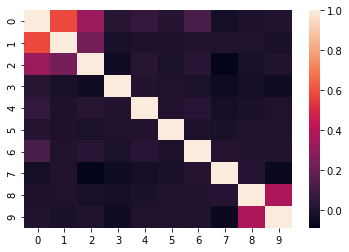

Key:
0 " I could not have conceived it ," said Syme gravely .
1 " That ' s a pity ," he said , " because I am ."
2 " Yes ," said Syme very seriously , " a promise .
3 " What is that noise ?"
4 They took their hats and sticks in silence ; but as Syme took his sword - stick , he held it hard .
5 " I tell you it can ' t be !"
6 " Or yet again ," tapped Syme , " it is positive , as is the passionate red hair of a beautiful woman ."
7 " Seeking a quarrel with me !"
8 He gave two long whistles , and a hansom came rattling down the road .
9 From the doorway there came a murmur of " Mr . Joseph Chamberlain ."


In [44]:
similarity = np.asarray(np.asmatrix(X_train_lsa) * np.asmatrix(X_train_lsa).T)
#Only taking the first 10 sentences
sim_matrix=pd.DataFrame(similarity,index=X_train).iloc[0:10,0:10]
#Making a plot
ax = sns.heatmap(sim_matrix,yticklabels=range(10))
plt.show()

#Generating a key for the plot.
print('Key:')
for i in range(10):
    print(i,sim_matrix.index[i])